In [1]:
import kagglehub 

# Download latest version
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)

c:\Users\snrpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 25.6k/25.6k [00:00<00:00, 26.2MB/s]

Extracting files...
Path to dataset files: C:\Users\snrpc\.cache\kagglehub\datasets\uciml\red-wine-quality-cortez-et-al-2009\versions\2


In [ ]:
import os

files = os.listdir(path)
print("files in directory", files)

Klasördeki dosyalar: ['winequality-red.csv']


In [ ]:
import pandas as pd


csv_file_path = os.path.join(path, "winequality-red.csv") 


df = pd.read_csv(csv_file_path)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#sumary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()
#std (Standart Sapma) Verilerin ne kadar değişken olduğunu gösterir.
#Standart sapması yüksek değişkenler, farklı değerler içerir ve bazen aykırı değerleri (outlier) tespit etmek için kullanılabilir.
# Eğer bir değişkenin standart sapması çok küçükse, model için çok fazla bilgi taşımıyor olabilir.



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
df.shape

(1599, 12)

In [24]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [20]:
df.duplicated().sum()

240

In [30]:
duplicates = df[df.duplicated(keep=False)]
duplicate_counts = duplicates.groupby(list(df.columns)).size().reset_index(name='count')
duplicate_counts.sort_values('count', ascending=False) 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,count
63,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,4
81,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5,6,4
22,6.7,0.460,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6,4
52,7.2,0.360,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,7,4
104,7.8,0.600,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,7.5,0.570,0.02,2.6,0.077,11.0,35.0,0.99557,3.36,0.62,10.8,6,2
83,7.5,0.600,0.03,1.8,0.095,25.0,99.0,0.99500,3.35,0.54,10.1,5,2
84,7.5,0.610,0.26,1.9,0.073,24.0,88.0,0.99612,3.30,0.53,9.8,5,2
85,7.5,0.630,0.27,2.0,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,2


In [31]:
df.drop_duplicates(inplace=True)

In [34]:
df.shape

(1359, 12)

In [ ]:
df.corr()
# Korelasyon; veri setindeki değişkenler arasındaki ilişkinin gücünü ve yönünü belirler.
# Yüksek korelasyonlar, iki değişkenin birbirleriyle güçlü bir ilişki içinde olduğunu gösterir.
# Zayıf korelasyonlar ise aralarındaki ilişkinin çok güçlü olmadığını belirtir.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<Axes: >

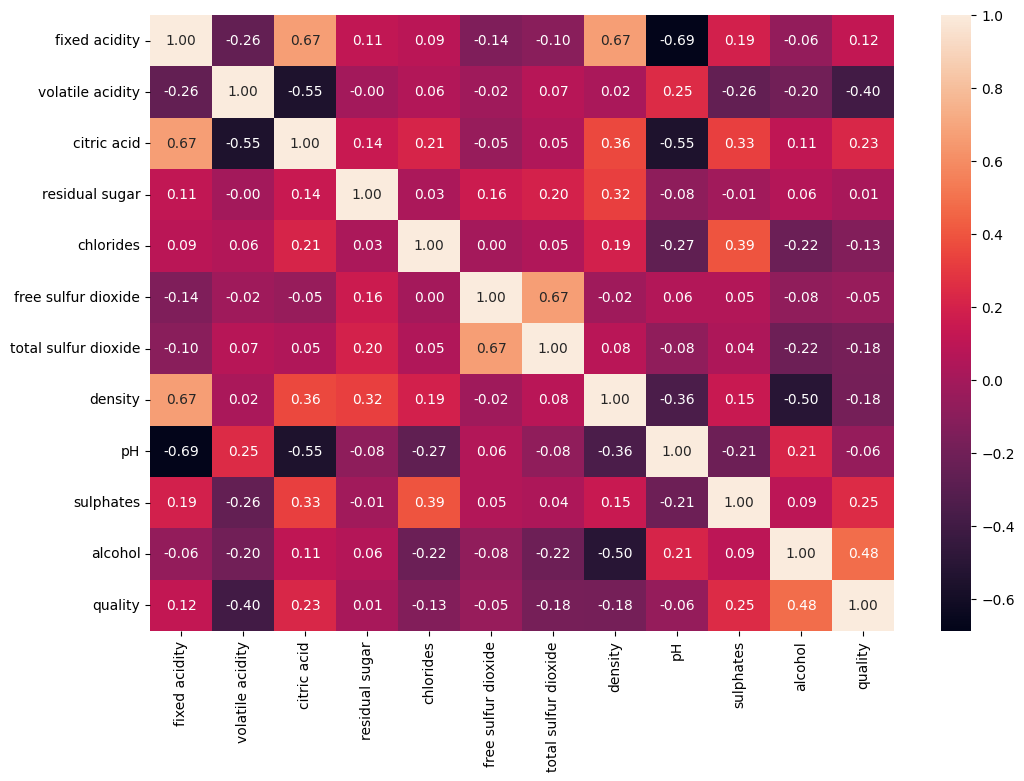

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [ ]:
df.quality.value_counts() #imbalanced dataset 5 and 6 are the most common values

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

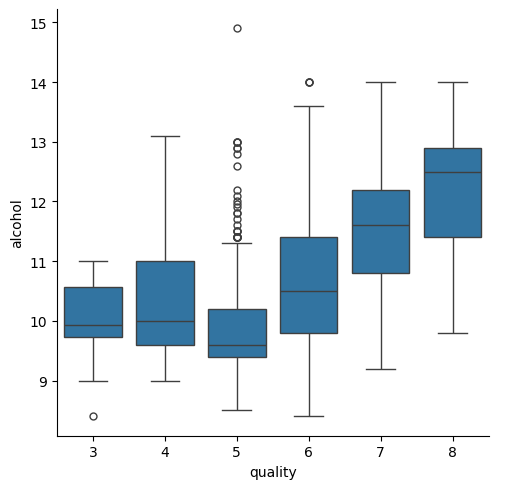

In [50]:
sns.catplot(x='quality',y='alcohol', data=df, kind='box')

<Axes: xlabel='alcohol', ylabel='sulphates'>

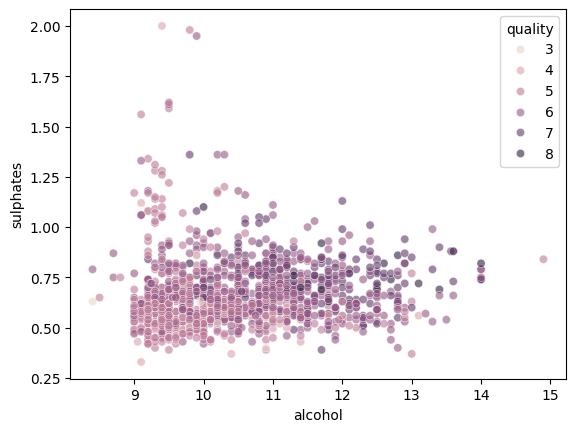

In [56]:
sns.scatterplot(x='alcohol', y='sulphates',  hue='quality', data=df, alpha=0.6)

C:\Users\snrpc\AppData\Local\Temp\ipykernel_7144\614145203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'inferno')


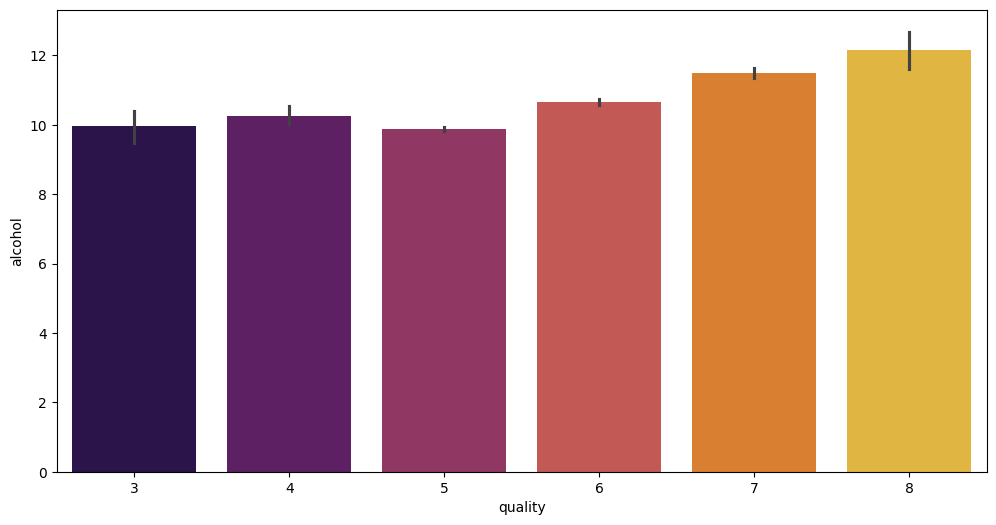

In [57]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'inferno')
plt.show()

(array([ 10.,  53., 577., 535., 167.,  17.]),
 array([3.        , 3.83333333, 4.66666667, 5.5       , 6.33333333,
        7.16666667, 8.        ]),
 <BarContainer object of 6 artists>)

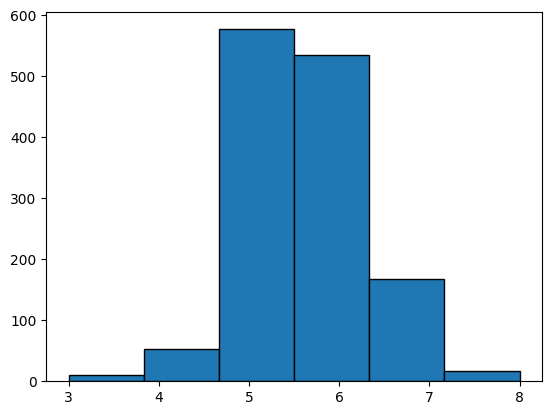

In [59]:
plt.hist(df['quality'], bins=6, edgecolor='black')